#                    Happiness Score Prediction

 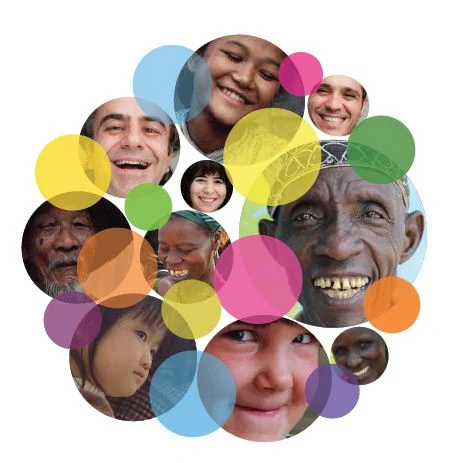

### Background




The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness

### About the data set


The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

### Objective

The purpose this work is to find out which factors are more important to live a happier life. 
As a result, people and countries can focus on the more significant factors to achieve a higher happiness level. 
We also will implement several machine learning algorithms to predict the happiness score and compare the result 
to discover which algorithm works better for this specific dataset.

### Table of Contents
1) Import Packages

2) EDA

3) Preparing ML models

4) Models evaluation

5) Ensembling

6) Conclusion

## Import Packages


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import warnings                    
warnings.filterwarnings("ignore")
from google_drive_downloader import GoogleDriveDownloader as gdd
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

Pulling file from google drive


*   By passing the file ID, we will extract the input file in our local directory



In [94]:
gdd.download_file_from_google_drive(file_id='1w92sdkbOOkp6I-BKdhLxVWg-51zRKR1K',
                                    dest_path='./TEH_World_Happiness_2015_2019_Imputed.csv',
                                    unzip=False)

In [95]:
df=pd.read_csv(r"TEH_World_Happiness_2015_2019_Imputed.csv")

In [96]:
df.shape

(782, 10)

In [97]:
df.head()

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [98]:
df.tail()

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
777,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
778,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
779,Afghanistan,154,3.203,0.350,0.517,0.361,NaN,0.158,0.025,2019
780,Central African Republic,155,3.083,0.026,NaN,0.105,0.225,0.235,0.035,2019
781,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019


In [99]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Happiness rank,782.0,78.698210,45.182384,1.000000,40.00000,79.000000,118.000000,158.000000
Happiness Score,782.0,5.379018,1.127456,2.693000,4.50975,5.322000,6.189500,7.769000
GDP per capita,777.0,0.921942,0.401937,0.015300,0.61900,0.985000,1.238000,2.096000
Social support,777.0,1.085332,0.318999,0.104190,0.87119,1.125000,1.330000,1.644000
Healthy life,777.0,0.616356,0.244177,0.005565,0.44300,0.649547,0.809158,1.141000
Freedom,777.0,0.413736,0.149757,0.005890,0.31200,0.432453,0.531220,0.724000
Generosity,777.0,0.219982,0.121445,0.001990,0.13352,0.202000,0.279920,0.838075
Corruption,775.0,0.126407,0.105646,0.001000,0.05500,0.092000,0.156352,0.551910
Year,782.0,2016.993606,1.417364,2015.000000,2016.00000,2017.000000,2018.000000,2019.000000


## Data Preprocessing

#### Identifying Null Values


###### Column level Count of Nulls

In [100]:
Null_Counts=(df.isna().sum())
Null_Counts

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     5
Social support     5
Healthy life       5
Freedom            5
Generosity         5
Corruption         7
Year               0
dtype: int64

##### Percentage of Nulls

In [101]:
Null_Counts.loc[ lambda x : x>0]/len(df)*100

GDP per capita    0.639386
Social support    0.639386
Healthy life      0.639386
Freedom           0.639386
Generosity        0.639386
Corruption        0.895141
dtype: float64

#### Treating Null Values
Since % of Null Values for the columns **[GDP per capita, Social support, Healthy life, Freedom, Generosity and Corruption]** is even less than 1%, deletion of attributes isn't required
Hence we would impute these values with the mean values

##### Data Imputation

In [102]:
df['GDP per capita'].fillna(df['GDP per capita'].mean(), inplace=True)
df['Social support'].fillna(df['Social support'].mean(), inplace=True)
df['Healthy life'].fillna(df['Healthy life'].mean(), inplace=True)
df['Freedom'].fillna(df['Freedom'].mean(), inplace=True)
df['Generosity'].fillna(df['Generosity'].mean(), inplace=True)
df['Corruption'].fillna(df['Corruption'].mean(), inplace=True)

In [103]:
df.isna().sum()

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     0
Social support     0
Healthy life       0
Freedom            0
Generosity         0
Corruption         0
Year               0
dtype: int64

## EDA

- Correlation Matrix

In [104]:
corr = df.corr()
fig = px.imshow(corr, text_auto=True)
fig.show()

- Strong Correlation

In [105]:
strong_corr=corr[abs(corr) > 0.5]
fig = px.imshow(strong_corr, text_auto=True)
fig.show()

- List of Strongly Correalted Pairs(+*ve*)

In [106]:
corr_matrix = df.corr()
high_corr_var=np.where(corr_matrix>0.5)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Happiness Score', 'GDP per capita'),
 ('Happiness Score', 'Social support'),
 ('Happiness Score', 'Healthy life'),
 ('Happiness Score', 'Freedom'),
 ('GDP per capita', 'Social support'),
 ('GDP per capita', 'Healthy life'),
 ('Social support', 'Healthy life')]

- List of Strongly Correalted Pairs(negative)

In [107]:
corr_matrix = df.corr()
high_corr_var=np.where(corr_matrix<-0.5)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Happiness rank', 'Happiness Score'),
 ('Happiness rank', 'GDP per capita'),
 ('Happiness rank', 'Social support'),
 ('Happiness rank', 'Healthy life'),
 ('Happiness rank', 'Freedom')]

Findings & Insights-
 

* Countries with High Happiness Score and Lower Happiness Rank are identical terms hence the **Happiness Rank Field could be dropped** from the data for further analysis to reduce multi-collinearity 
* Countries with High GDP Per Capita, Social support, Healthy life and Freedom have higher Happiness Scores and better Happiness Ranks
* Countries with Higher GDP per capita are able to provide better Social support and  Healthy life to their citizens
* Countries with better Social support provide Healthy life to their citizens



In [108]:
fig = px.histogram(df[df["Year"]==2019], x="Happiness Score")
fig.show()


The Happiness Scores are close to normal distribution

- Demonstration of Happiness Scores on World Map

In [109]:
choromap = go.Figure(data=dict(type='choropleth', 
             locations=df['Country'],
             locationmode='country names',
             z=df['Happiness rank'], 
             text=df['Country'],
             reversescale=False))
iplot(choromap)

Findings and Insights

The representation clearly depicts that Europian, American and Australian countries have fairly higher happiness scores in comparison to Asian and African Countries.

- Pair Plots

In [110]:
fig = make_subplots(rows=3, cols=3)

fig.add_trace(
    go.Scatter(x=df['GDP per capita'], y=df['Happiness Score'], mode="markers",name="GDP vs Happiness"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df['Social support'], y=df['Happiness Score'], mode="markers",name="Social support vs happiness"),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=df['Healthy life'], y=df['Happiness Score'], mode="markers",name="Health vs Happiness"),
    row=1, col=3)

fig.add_trace(
    go.Scatter(x=df['Freedom'], y=df['Happiness Score'], mode="markers",name="Freedom vs Happiness"),
    row=2, col=1)

fig.add_trace(
    go.Scatter(x=df['GDP per capita'], y=df['Social support'], mode="markers",name="GDP vs Social Support"),
    row=2, col=2)

fig.add_trace(
    go.Scatter(x=df['GDP per capita'], y=df['Healthy life'], mode="markers",name="GDP vs Health"),
    row=2, col=3)

fig.add_trace(
    go.Scatter(x=df['Healthy life'], y=df['Social support'], mode="markers",name="Health vs Social Support"),
    row=3, col=1

)


fig.show()


Findings & Insights-
 

* Countries with High Happiness Score and Lower Happiness Rank are identical terms hence the **Happiness Rank Field could be dropped** from the data for further analysis to reduce multi-collinearity 
* Countries with High GDP Per Capita, Social support, Healthy life and Freedom have higher Happiness Scores and better Happiness Ranks
* Countries with Higher GDP per capita are able to provide better Social support and  Healthy life to their citizens
* Countries with better Social support provide Healthy life to their citizens



- Top 10 and Bottom 10 Countries by *GDP* Per Capita

In [111]:
fig = px.bar(df[['Country', 'GDP per capita','Happiness Score']].groupby('Country').mean().sort_values(by='GDP per capita', ascending=False).head(10),color='Happiness Score', title='Top 10 GDP Per Capita')
fig.show()
fig = px.bar(df[['Country', 'GDP per capita','Happiness Score']].groupby('Country').mean().sort_values(by='GDP per capita', ascending=False).tail(10),color='Happiness Score', title='Bottom 10 GDP Per Capita')
fig.show()


Insights & Findings

This chart indicates that citizens might be rich but that doesn't neccesarily mean they are Happy

- Top 10 and Bottom 10 Countries by Social Support

In [112]:
fig = px.bar(df[['Country', 'Social support','Happiness Score']].groupby('Country').mean().sort_values(by='Social support', ascending=False).head(10),color='Happiness Score', title='Top 10 Social support')
fig.show()
fig = px.bar(df[['Country', 'Social support','Happiness Score']].groupby('Country').mean().sort_values(by='Social support', ascending=False).tail(10),color='Happiness Score', title='Bottom 10 Social support')
fig.show()


Insights and Findings

Social Support isn't much of a strong indicator towards happiness but it is a neccesity to be happy

- Top 10 and Bottom 10 Countries by Freedom

In [113]:
fig = px.bar(df[['Country', 'Freedom','Happiness Score']].groupby('Country').mean().sort_values(by='Freedom', ascending=False).head(10),color='Happiness Score', title='Top 10 Freedom')
fig.show()
fig = px.bar(df[['Country', 'Freedom','Happiness Score']].groupby('Country').mean().sort_values(by='Freedom', ascending=False).tail(10),color='Happiness Score', title='Bottom 10 Freedom')
fig.show()


Insights and Findings

Freedom seems to be an important neccessity for Happiness for most of the countries

## Feature Engineering and Feature Selection
- Classification
- Regression

Since Happiness Score and Happiness Ranks are strongly correlated, therefore to balance the weights and reduce multi collinearity we will drop one of these fields.
Since Happiness Score is more informative as the ranks are derived out of scores, and basically Rank is completely dependent on the Scores therefore we will drop the Happiness Ranks

Moreover, since Country name is non numeric and doesn't provide much information, we will drop Country as well.

Since we are combining data for multiple years and creating one final model and there is no seasonality and time series relation between the data points hence we will drop the year field as well.


In [114]:
df = df.drop(['Country', 'Happiness rank', 'Year'], axis=1)
df.dtypes

Happiness Score    float64
GDP per capita     float64
Social support     float64
Healthy life       float64
Freedom            float64
Generosity         float64
Corruption         float64
dtype: object

Since we have completely numeric data, we are good to go ahead with the next steps in model building


Happy/Unhappy Classification - We will take top **66.66 percentile** of countries as happy and rest as unhappy. We are assuming that 1/3rd of the world is happy and remaining 2/3rd is unhappy
**bold text**
The country having Happiness Score **not belonging to the scores for top 66.66** %ile will be assigned as Happiness Flag as 0 and the ones belonging to **top 66.66% as 1**

We are following %ile approach instead of average to avoid skewing of the data

In [115]:
top_60_percentile=np.percentile(df['Happiness Score'], 66)
top_60_percentile

5.89192

In [116]:
df['Happiness Flag'] = df['Happiness Score'].apply(lambda x: 0 if x <= top_60_percentile  else 1)
df['Happiness Flag'].value_counts()

0    516
1    266
Name: Happiness Flag, dtype: int64

- **Happiness Flag** - Target Variable for Classification Model
- **Happiness Score** - Target Variable for Regression Model

## Classification 

 Problem statement :- To predict which country belongs to top **1/3rd** Countries on happiness scale

Preparing Training and Testing Data

In [117]:
df_x_class=df[['GDP per capita', 'Social support', 'Healthy life',
       'Freedom', 'Generosity', 'Corruption']]
df_y_class=df['Happiness Flag']
from sklearn.model_selection import train_test_split
df_x_train,df_x_test,df_y_train,df_y_test= train_test_split(df_x_class,df_y_class,test_size=.15)

### 1. Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [119]:
logreg.fit(df_x_train,df_y_train)

LogisticRegression()

In [120]:
pred_value = logreg.predict(df_x_test)

In [126]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_value,df_y_test)

print("confussion matrix")
print(tab1)

confussion matrix
[[72  5]
 [ 8 33]]


In [127]:
# evaluate the model on the test set
from sklearn.metrics import classification_report
y_pred = logreg.predict(df_x_test)
print(classification_report(df_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        80
           1       0.80      0.87      0.84        38

    accuracy                           0.89       118
   macro avg       0.87      0.88      0.88       118
weighted avg       0.89      0.89      0.89       118



In [128]:
from sklearn.metrics import roc_auc_score, roc_curve

In [129]:
# Calculate the ROC score
roc_score=roc_auc_score(pred_value,df_y_test)
roc_score

0.8699714919227114

In [130]:
# Calculate the AUC score
auc_score = roc_auc_score(df_y_test, y_pred)
auc_score

0.8842105263157894

In [34]:
fpr, tpr, thresholds = roc_curve(df_y_test, y_pred)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### 2. KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier

lst=[]

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_x_train,df_y_train)
    pred_knn = knn.predict(df_x_test)
    tab_knn = confusion_matrix(pred_knn,df_y_test)
    acc = tab_knn.diagonal().sum() / tab_knn.sum()
    lst.append(acc)


fig = px.line(lst)
fig.show()

Since there is a sudden dip at 10, hence the value of K=10

In [132]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(df_x_train,df_y_train)
pred_knn = knn.predict(df_x_test)

tab_knn = confusion_matrix(pred_knn,df_y_test)

print("confussion matrix")
print(tab_knn)

confussion matrix
[[74  9]
 [ 6 29]]


In [133]:
# evaluate the model on the test set
from sklearn.metrics import classification_report
y_pred_knn = knn.predict(df_x_test)
print(classification_report(df_y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        80
           1       0.83      0.76      0.79        38

    accuracy                           0.87       118
   macro avg       0.86      0.84      0.85       118
weighted avg       0.87      0.87      0.87       118



In [134]:
# Calculate the ROC score
roc_score=roc_auc_score(pred_knn,df_y_test)
roc_score

0.8600688468158348

In [135]:
# Calculate the AUC score
auc_score = roc_auc_score(df_y_test, y_pred_knn)
auc_score

0.844078947368421

In [136]:
fpr, tpr, thresholds = roc_curve(df_y_test, y_pred_knn)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### 3. SVM

In [137]:
from sklearn.svm import LinearSVC
sv=LinearSVC()

In [138]:
sv.fit(df_x_train,df_y_train)

LinearSVC()

In [140]:
pred_sv= sv.predict(df_x_test)
tab_sv=confusion_matrix(pred_sv,df_y_test)

print("confussion matrix")
print(tab_sv)

confussion matrix
[[71  7]
 [ 9 31]]


In [141]:
# evaluate the model on the test set
from sklearn.metrics import classification_report
y_pred_sv = sv.predict(df_x_test)
print(classification_report(df_y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        80
           1       0.78      0.82      0.79        38

    accuracy                           0.86       118
   macro avg       0.84      0.85      0.85       118
weighted avg       0.87      0.86      0.87       118



In [45]:
# Calculate the ROC score
roc_score_log=roc_auc_score(pred_sv,df_y_test)
roc_score_log

0.7513904338153504

In [142]:
# Calculate the AUC score
auc_score = roc_auc_score(df_y_test, y_pred_sv)
auc_score

0.8516447368421053

In [143]:
fpr, tpr, thresholds = roc_curve(df_y_test, y_pred_sv)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### Summary - Classification


1.   **Pre-processing/Feature Engineering steps performed on this data**
  - Created a 'Happiness Flag' with values 0 or 1 indicating if a country is happy or not. We made and assumption that 1/3rd of the world is happy and remaining 2/3rd is unhappy bold text. The country having Happiness Score not belonging to the scores for top 66.66 %ile will be assigned as Happiness Flag as 0 and the ones belonging to top 66.66% as 1
  - Dropped the columns Happiness Rank, Year and Country
  - Data was split into training and testing set in ratio of 85:15 ratio
2.   **The choice of target attribute**
 - 'Happiness Flag' is taken as the target attribute. Based on the previously mentioned logic, we are training the data based on mentioned 'Happiness Flag' and predicting the same binary output with the input attributes


 
3. **The quality of ML Model and choice of evaluation metric**
  
The models used in this use cases are as follows
 - Logistic Regression
 - KNN
 - SVM

As an intermedite step, we would also be calculate precision and recall. Here we need to predict the probability of a sample belonging to one of the two classes. So we'll be using precision, recall, and f1-score as the evaluation metric since this is the most appropriate evaluation metric for Classification models. Furthermore we wil be evaluating all the models with ROC-AUC to distinguish TPR against FPR.


4. **Observation about the results**
 - Logistic Regression - Precision is XX and Recall is XX which indicates that the data has imbalanced/balanced class distribution. The Accuracy of XX suggest that the model is good/poor fit for the given use case. The ROC and AUC scores are XX which indicates the models ability to correctly/poorly distinguish between positive and negative cases.
Overall the evaluation metrics suggest that the performance of model is satisfactory/ unsatisfaqctory and the model can be/ cannot be used for the given problem statement.

 - KNN
 - SVM


## Regression
Problem statement :- To predict happiness scores of countries based on input parameters

Prepare Train and Test Data

In [144]:
X_reg=df[['GDP per capita', 'Social support', 'Healthy life',
       'Freedom', 'Generosity', 'Corruption']]
y_reg=df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.15)

### 1. Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, explained_variance_score

In [146]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [147]:
# Make predictions on test data
y_pred = lr.predict(X_test)

In [148]:
fig = px.scatter(x=y_test, y=y_pred,labels={'x':'Actual', 'y':'Predicted'},title='Actual vs Predicted')
fig.show()

In [149]:
# Evaluate model performance
r2_score_v=r2_score(y_test, y_pred)
print("R2 Score:", r2_score_v)
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
# Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
# Variance Score (explained_variance_score)
variance_score = explained_variance_score(y_test, y_pred)
print("Variance Score:", variance_score)

R2 Score: 0.7811891549759973
Mean squared error (MSE): 0.29551503814277963
Mean Absolute Error (MAE): 0.4409786323286341
Root Mean Squared Error (RMSE): 0.5436129488365593
Variance Score: 0.7820975962418786


### 2. Lasso Regression

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso


In [151]:
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(X_train, y_train)

Lasso()

In [152]:
y_pred_l = lr.predict(X_test)

In [153]:
# evaluate model
MAE_Lasso = cross_val_score(model,X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
MAE_lasso_m= np.mean(abs(MAE_Lasso))
print("Mean Absolute Error (MAE):", MAE_lasso_m)


Mean Absolute Error (MAE): 0.9331049874489916


In [154]:
fig = px.scatter(x=y_test, y=y_pred_l,labels={'x':'Actual', 'y':'Predicted'},title='Actual vs Predicted(Lasso)')
fig.show()

### 3. Ridge Regularization

In [155]:
# Model Training
from sklearn.linear_model import Ridge
alpha = 0.05
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.05)

In [156]:
y_pred_ridge = ridge.predict(X_test)

In [157]:
mse = mean_squared_error(y_test, y_pred_ridge)
print('MSE:', mse)
mae = mean_absolute_error(y_test, y_pred_ridge)
print('MAE:', mae)
r2 = r2_score(y_test, y_pred_ridge)
print('R-squared:', r2)

MSE: 0.2955650052201269
MAE: 0.4411008793980765
R-squared: 0.7811521574056318


In [158]:
fig = px.scatter(x=y_test, y=y_pred_ridge,labels={'x':'Actual', 'y':'Predicted'},title='Actual vs Predicted(Ridge)')
fig.show()

### 4. Random Forest Regression

In [159]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [160]:
y_pred_rf = rf.predict(X_test)

In [161]:
mse = mean_squared_error(y_test, y_pred_rf)
print('MSE:', mse)
mae = mean_absolute_error(y_test, y_pred_rf)
print('MAE:', mae)
r2 = r2_score(y_test, y_pred_rf)
print('R-squared:', r2)

MSE: 0.259662309273563
MAE: 0.4065702509311684
R-squared: 0.8077359119518619


In [162]:
fig = px.scatter(x=y_test, y=y_pred_rf,labels={'x':'Actual', 'y':'Predicted'},title='Actual vs Predicted(Random Forest)')
fig.show()

### Summary - Regression


1.   **Pre-processing/Feature Engineering steps performed on this data**
  - We dropped the columns Happiness Rank, Year and Country. 
  - Data was split into training and testing set in ratio of 85:15 ratio
2.   **The choice of target attribute -  'Happiness Score'**
 - Happiness Score is calculated based on weighted paramters from the input data by WHO. Since based on the score the ranks are getting calculated, hence it is taken as the Target attribute and we'd be predicting the same with all the regression models
 
3. **The quality of ML Model and choice of evaluation metric**
 - Linear Regression
 - Lasso Regression
 - Ridge regularization
 - Random Forest Regression

 The Metrics used to calculate the accuracy are -
 - R-squared (R²) score
 - Mean squared error (MSE)
 - Mean absolute error (MAE)
 - Root mean squared error (RMSE)
 - Variance score

 It's always recommended to have lower MSE and MAE. R2 score help to interpret the proportion of variance in the target variable.

4. **Observation about the results**
 - Linear Regression 
    - R2 score is 0.78 which indicates low variance. This also indicates a better fit of the model in the given problem statement 
    - MSE score is 0.29 hence the overall accuracy is high.
    - MAE/MAPE is 0.44 hence the absolute accuracy is high.

    Overall the evaluation metrics suggest that the performance of model is satisfactory/ unsatisfaqctory and the model can be/ cannot be used for the given problem statement.
 - Lasso Regression
 - Ridge regularization
 - Random Forest Regression


## Ensemble Learning

### Max Voting - Classifier

In [163]:
df_x=df[['GDP per capita', 'Social support', 'Healthy life',
       'Freedom', 'Generosity', 'Corruption']]
df_y=df['Happiness Flag']
from sklearn.model_selection import train_test_split
df_x_train,df_x_test,df_y_train,df_y_test= train_test_split(df_x,df_y,test_size=.15)

In [164]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=10)
model3= LinearSVC()
model_max_vote = VotingClassifier(estimators=[('lr', model1), ('knn', model2),('svm',model3)], voting='hard')
model_max_vote.fit(df_x_train,df_y_train)
model_max_vote.score(df_x_test,df_y_test)

0.847457627118644

In [165]:
from sklearn.metrics import log_loss
# predicting the output on the test dataset
pred_final_mv = model_max_vote.predict(df_x_test)
 
# printing log loss between actual and predicted value
print(log_loss(df_y_test, pred_final_mv))

5.268674341444099


In [166]:
fpr, tpr, thresholds = roc_curve(df_y_test, pred_final_mv)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

### Max Voting - Regression

In [167]:
X=df[['GDP per capita', 'Social support', 'Healthy life',
       'Freedom', 'Generosity', 'Corruption']]
y=df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [168]:
from sklearn.ensemble import VotingRegressor
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model3= Lasso(alpha=1.0)
model_max_vote = VotingRegressor(estimators=[('lr', model1), ('rf', model2),('lasso',model3)])
model_max_vote.fit(X_train,y_train)
model_max_vote.score(X_test,y_test)

0.7235326931315154

### Summary - Ensemble


1.   **Pre-processing/Feature Engineering steps performed on this data**
  - Created a 'Happiness Flag' with values 0 or 1 indicating if a country is happy or not. We made and assumption that 1/3rd of the world is happy and remaining 2/3rd is unhappy bold text. The country having Happiness Score not belonging to the scores for top 66.66 %ile will be assigned as Happiness Flag as 0 and the ones belonging to top 66.66% as 1
  - Dropped the columns Happiness Rank, Year and Country
  - Data was split into training and testing set in ratio of 85:15 ratio
2.   **The choice of target attribute -  'Happiness Score' for Regressor and 'Happiness Flag' for Classifier**
  - 'Happiness Flag' is taken as the target attribute. Based on the previously mentioned logic, we are training the data based on mentioned 'Happiness Flag' and predicting the same binary output with the input attributes
   - Happiness Score is calculated based on weighted paramters from the input data by WHO. Since based on the score the ranks are getting calculated, hence it is taken as the Target attribute and we'd be predicting the same with all the regression models
 
3. **The quality of ML Model and choice of evaluation metric**
 - Max Voting - Classifier
 - Max Voting - Regressor

4. **Observation about the results**
 - Max Voting - Classifier
 - Max Voting - Regressor
